In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\asus\\Downloads\\bigml_59c28831336c6604c800002a.csv")

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.shape

(3333, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [10]:
numerical=df.select_dtypes(include='number')
categorical=df.select_dtypes(exclude='number')

In [11]:
numerical

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [12]:
categorical

,state,phone number,international plan,voice mail plan,churn
0,KS,382-4657,no,yes,False
1,OH,371-7191,no,yes,False
2,NJ,358-1921,no,no,False
3,OH,375-9999,yes,no,False
4,OK,330-6626,yes,no,False
...,...,...,...,...,...
3328,AZ,414-4276,no,yes,False
3329,WV,370-3271,no,no,False
3330,RI,328-8230,no,no,False
3331,CT,364-6381,yes,no,False


In [13]:
x=numerical
def histplot():
    for i in x:
        sns.histplot(data=df,x=i)
        plt.show()

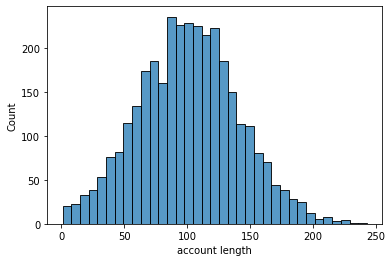

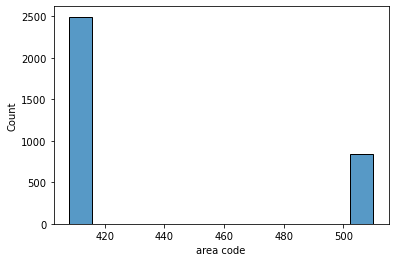

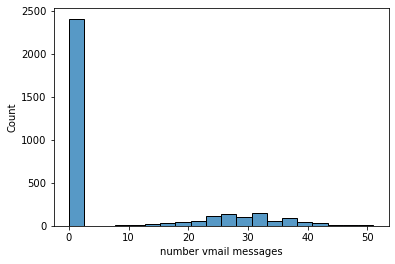

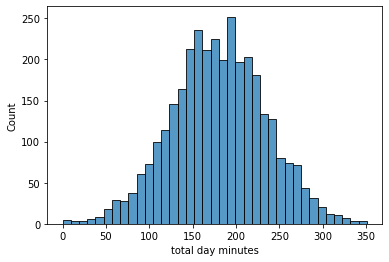

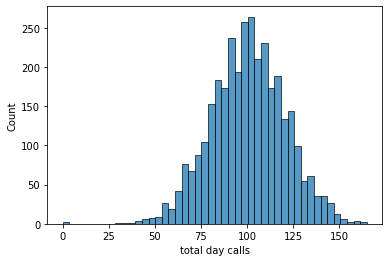

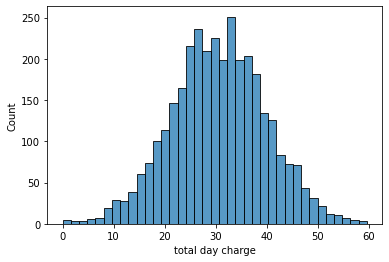

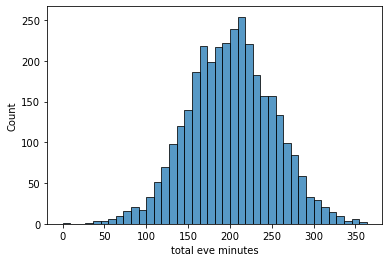

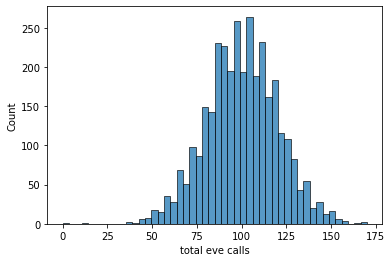

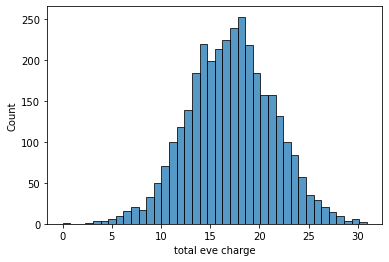

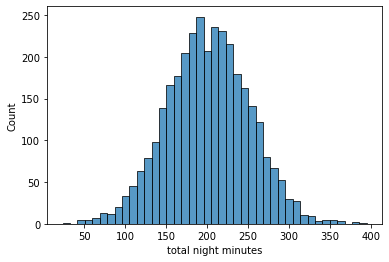

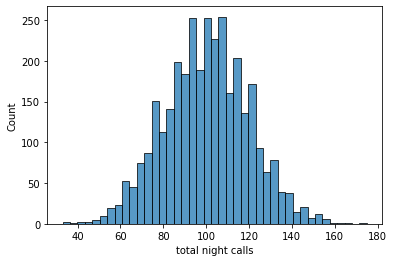

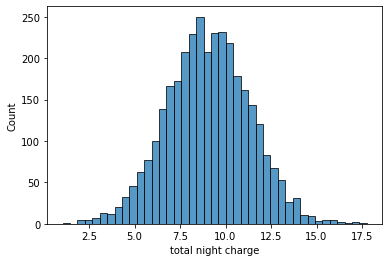

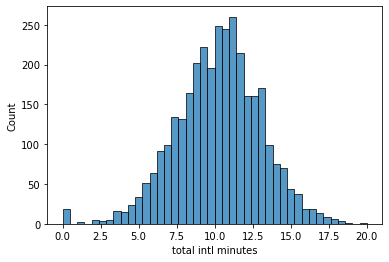

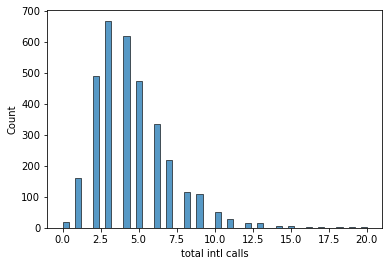

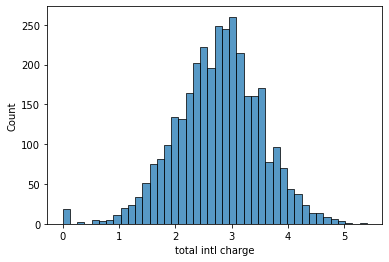

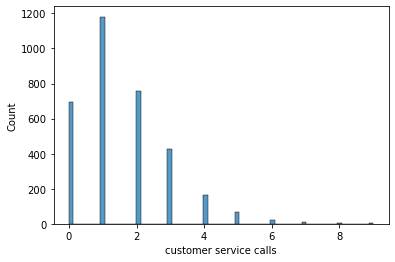

In [14]:
histplot()

In [15]:
x=numerical
def boxplot():
    for i in x:
        plt.figure(figsize=(10,6))
        sns.boxplot(data=df,x=i)
        plt.show()

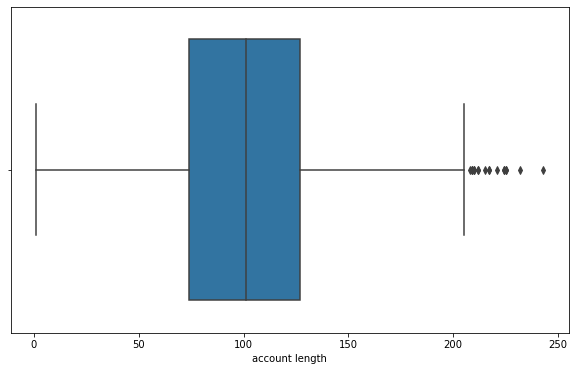

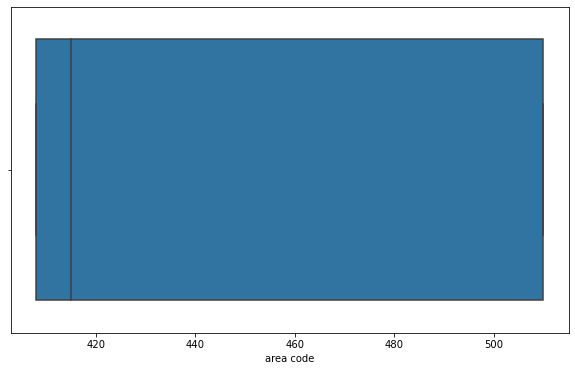

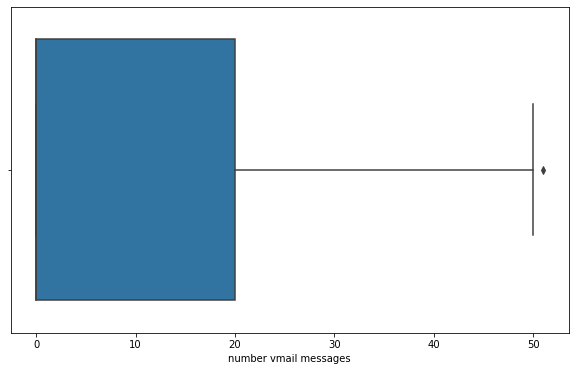

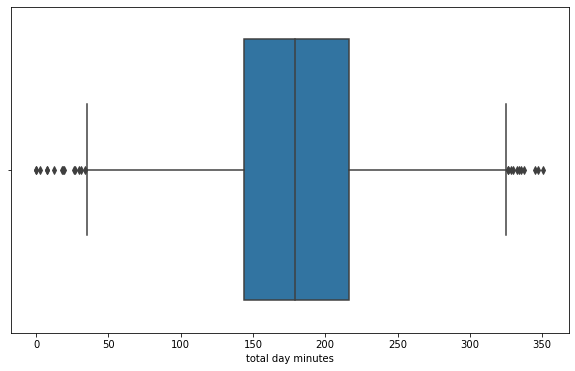

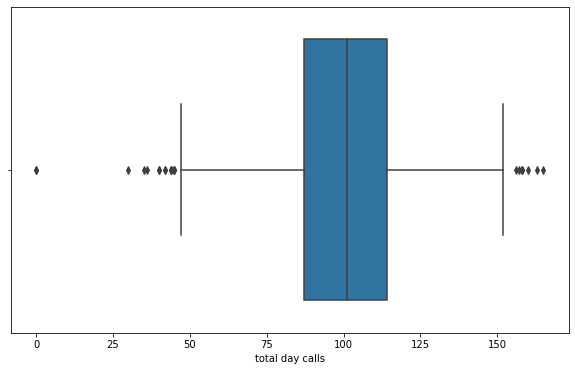

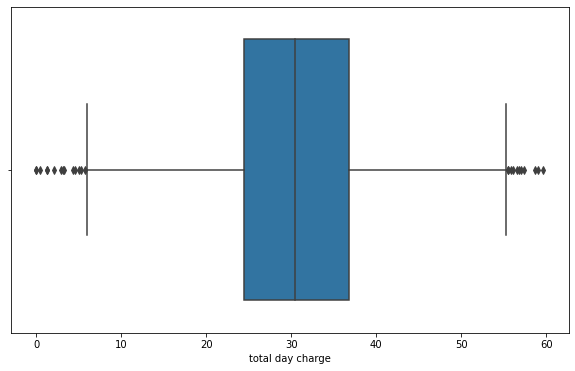

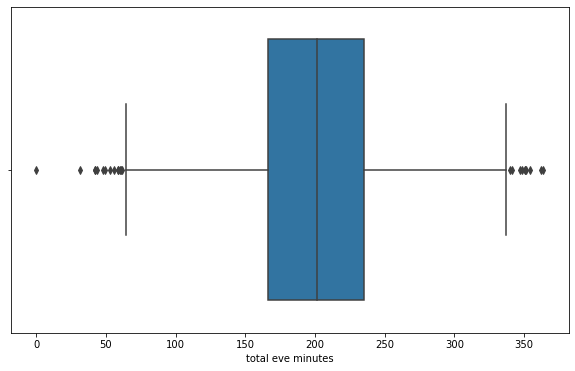

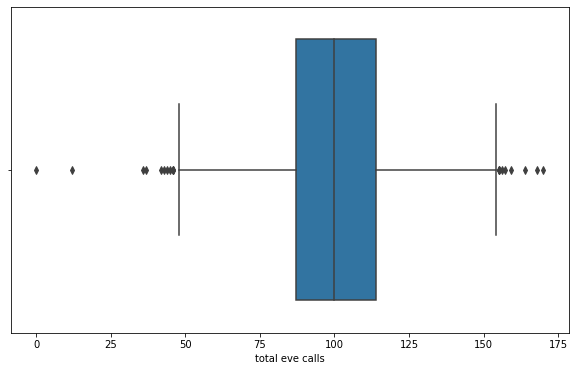

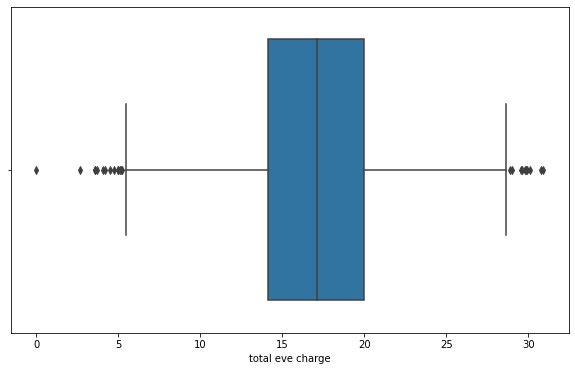

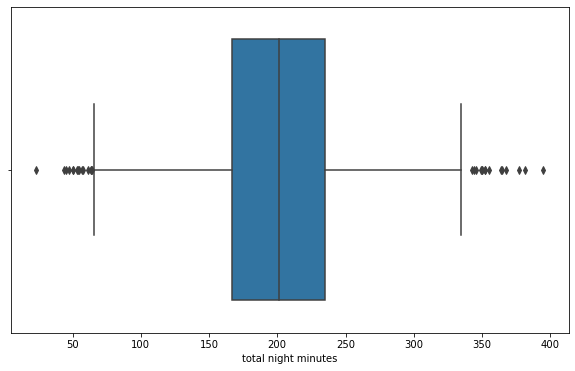

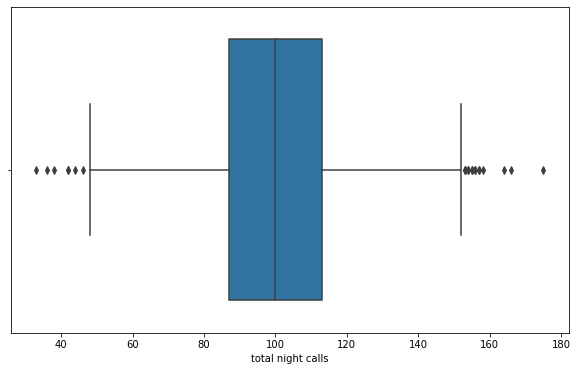

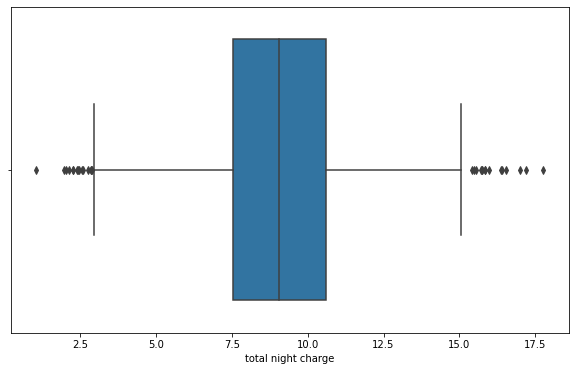

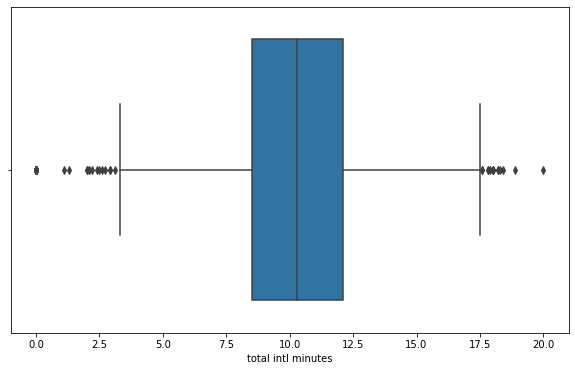

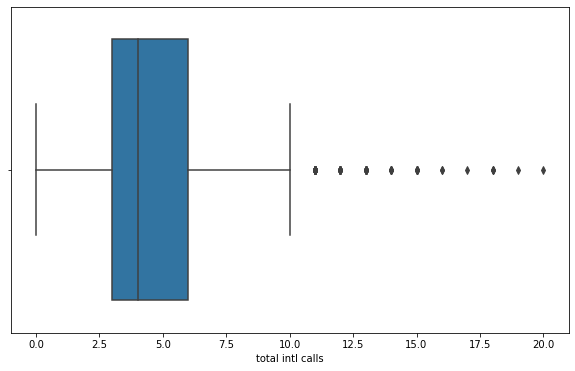

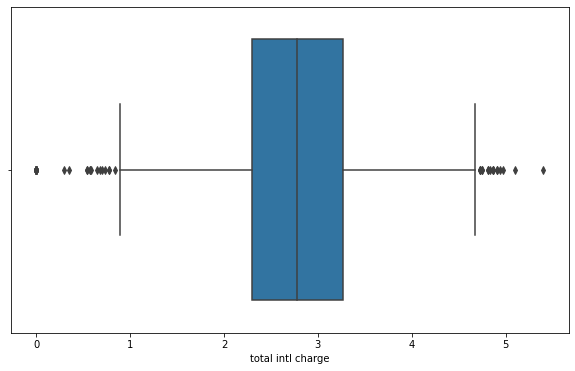

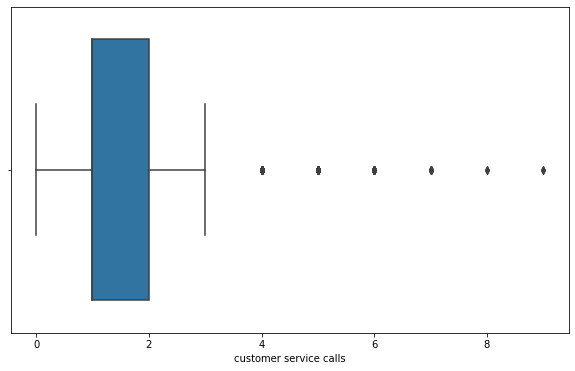

In [16]:
boxplot()

In [17]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

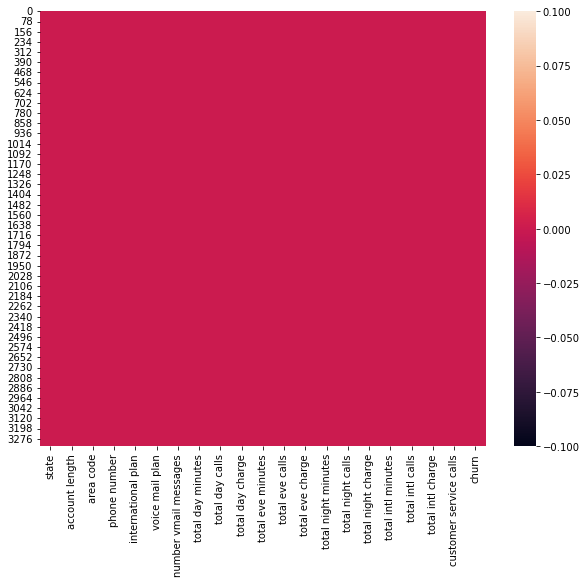

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

In [19]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

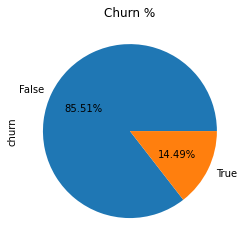

In [20]:
df['churn'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Churn %")
plt.show()

In [21]:
categorical.nunique()

state                   51
phone number          3333
international plan       2
voice mail plan          2
churn                    2
dtype: int64

In [22]:
for i in df["state"].unique():
    print(f'A customer from state of {i} has a probability of {round(df[df["state"]==i]["churn"].mean()*100,2)} % churn.')

A customer from state of KS has a probability of 18.57 % churn.
A customer from state of OH has a probability of 12.82 % churn.
A customer from state of NJ has a probability of 26.47 % churn.
A customer from state of OK has a probability of 14.75 % churn.
A customer from state of AL has a probability of 10.0 % churn.
A customer from state of MA has a probability of 16.92 % churn.
A customer from state of MO has a probability of 11.11 % churn.
A customer from state of LA has a probability of 7.84 % churn.
A customer from state of WV has a probability of 9.43 % churn.
A customer from state of IN has a probability of 12.68 % churn.
A customer from state of RI has a probability of 9.23 % churn.
A customer from state of IA has a probability of 6.82 % churn.
A customer from state of MT has a probability of 20.59 % churn.
A customer from state of NY has a probability of 18.07 % churn.
A customer from state of ID has a probability of 12.33 % churn.
A customer from state of VT has a probability

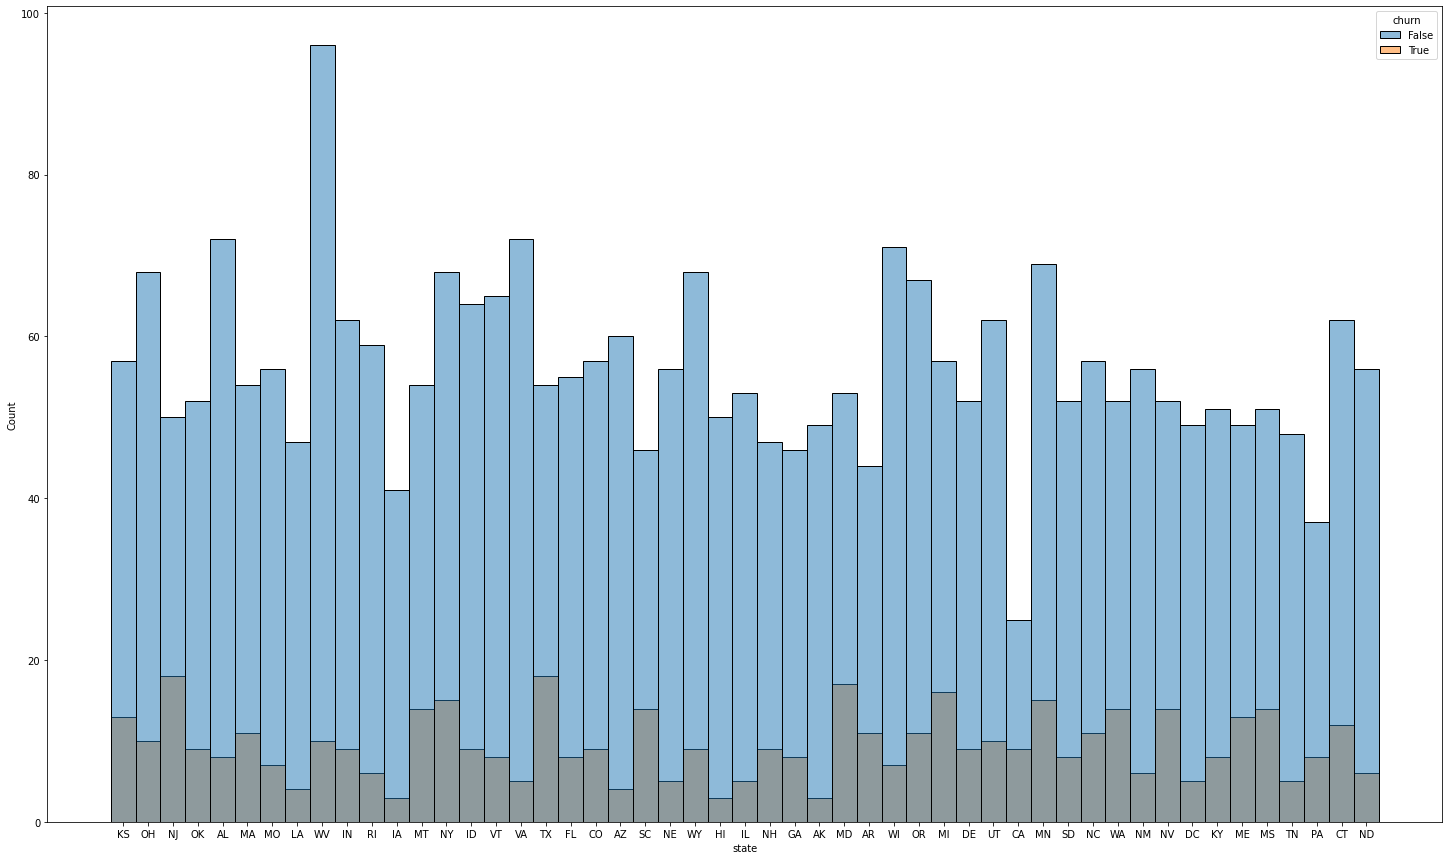

In [23]:
plt.figure(figsize=(25,15))
sns.histplot(data=df, x='state', hue='churn')
plt.show()

In [24]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

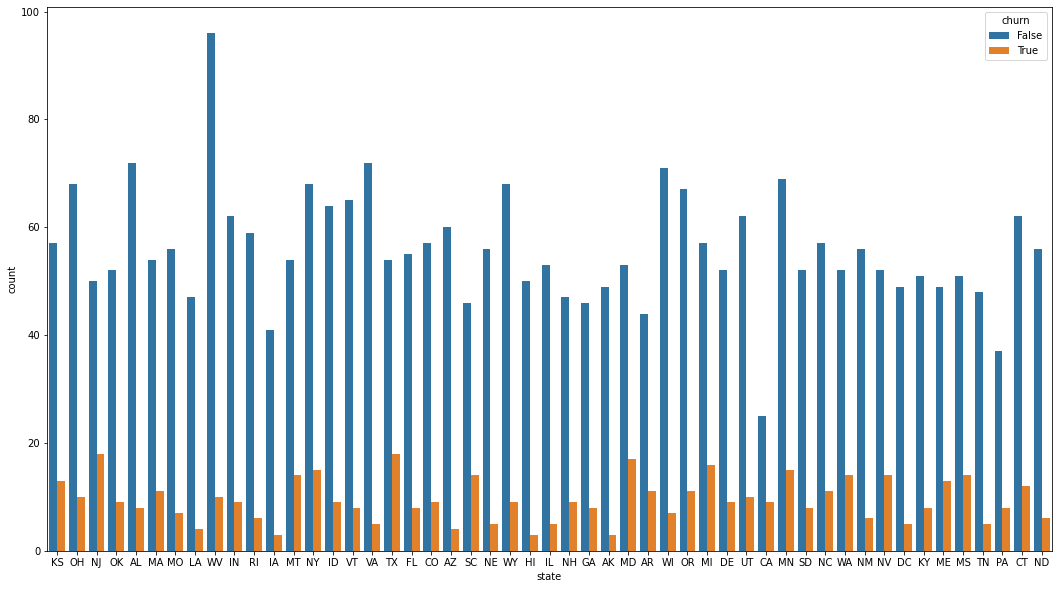

In [25]:
plt.figure(figsize=(18,10))
sns.countplot(data=df,x='state',hue='churn')
plt.show()

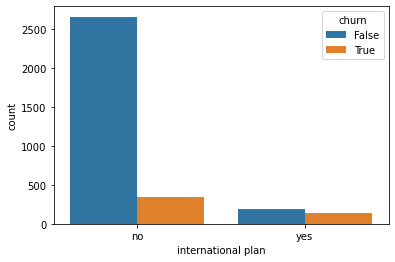

In [26]:
sns.countplot(data=df,x='international plan',hue='churn')
plt.show()

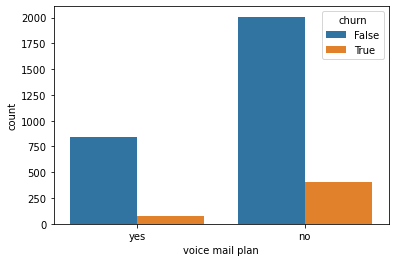

In [27]:
sns.countplot(data=df,x='voice mail plan',hue='churn')
plt.show()

In [28]:
df.drop('phone number',axis=1,inplace=True)

In [29]:
Le=preprocessing.LabelEncoder()
for i in df:
    if (df[i].dtype == np.object_ or df[i].dtype == np.bool_):
        df[i]=Le.fit_transform(df[i])       

In [30]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


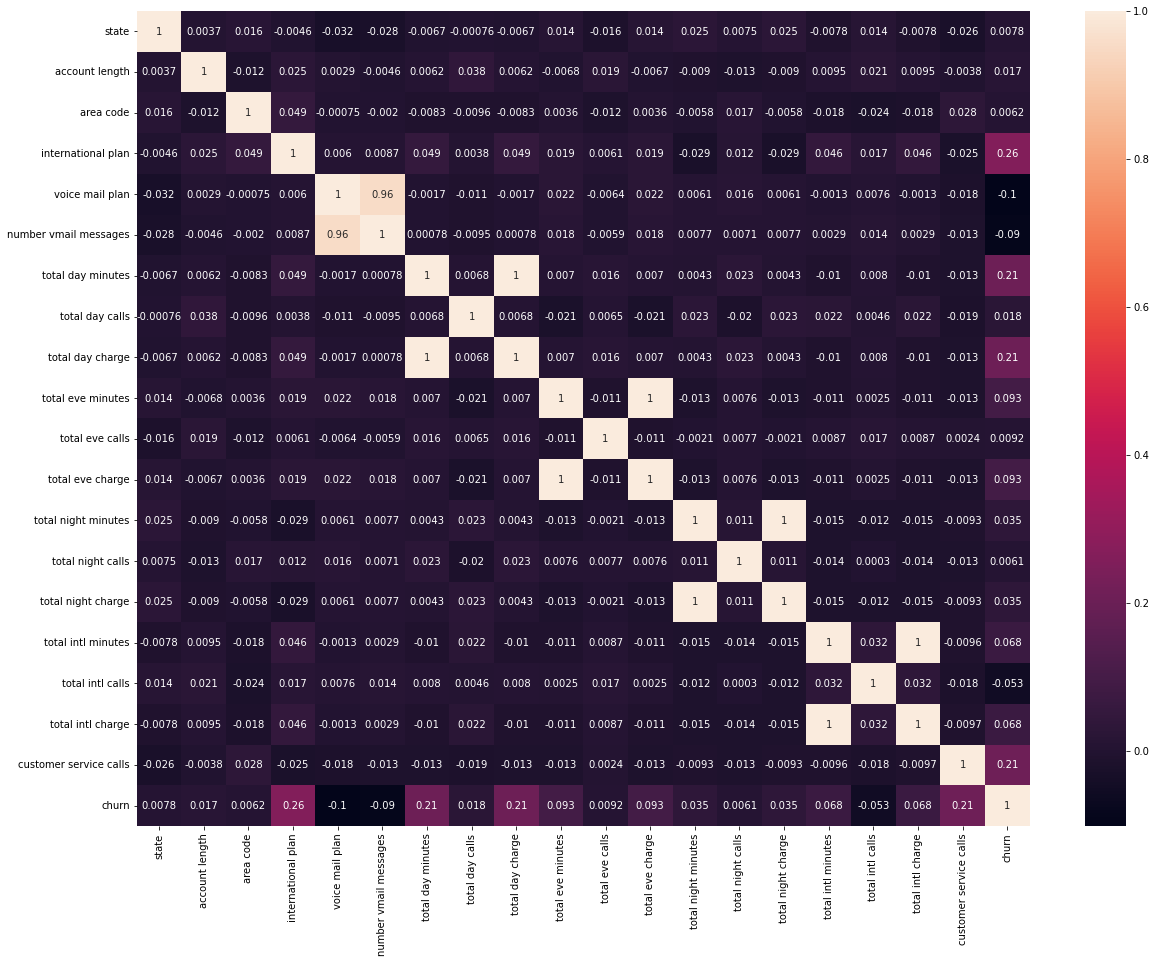

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True);
plt.show()

In [32]:
#for i in df:
#    if (df[i].dtype != np.object_):
#        df[i]=df[i].astype(float)        

In [33]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [34]:
x=df.drop(['churn','total eve charge','total day charge','total night charge','total intl charge'],axis=1)
y=df["churn"]

In [35]:
print('shape of x=',(x.shape))
print('shape of y=',(y.shape))

shape of x= (3333, 15)
shape of y= (3333,)


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [37]:
x_train

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
2654,21,66,510,0,0,0,207.7,85,196.7,112,261.7,83,6.8,3,1
3162,44,81,415,0,0,0,129.9,121,230.1,105,140.5,123,13.3,3,0
2333,32,16,510,0,0,0,144.8,84,164.9,141,231.5,75,8.2,4,2
553,44,61,510,1,0,0,78.2,103,195.9,149,108.0,100,10.1,6,2
1921,8,136,415,0,0,0,101.7,105,202.8,99,136.2,119,9.4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,27,116,408,0,1,19,155.7,104,185.4,118,192.7,116,8.2,2,3
905,49,161,415,0,0,0,191.9,113,70.9,87,204.8,107,13.4,4,4
1096,39,93,415,0,0,0,98.4,78,249.6,129,248.2,114,14.2,4,1
235,23,139,510,0,0,0,134.4,106,211.3,98,193.6,125,10.2,2,5


In [38]:
sc=StandardScaler()

In [39]:
x_train=sc.fit_transform(x_train)

In [40]:
x_test=sc.fit_transform(x_test)

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr=LogisticRegression()

In [43]:
lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred=lr.predict(x_test)

In [45]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [46]:
lr.score(x_train,y_train)

0.8639455782312925

In [47]:
lr.score(x_test,y_test)

0.8537170263788969

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
print(accuracy_score(y_pred,y_test))
print()
print(confusion_matrix(y_pred,y_test))
print()
print(classification_report(y_pred,y_test))

0.8537170263788969

[[691 101]
 [ 21  21]]

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       792
           1       0.17      0.50      0.26        42

    accuracy                           0.85       834
   macro avg       0.57      0.69      0.59       834
weighted avg       0.93      0.85      0.89       834



In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = [    
    {'C' : np.logspace(-4, 4, 20),
     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100, 1000,2500, 5000]
     }
]
print(param_grid)

[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}]


In [52]:
grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=10,verbose=2,n_jobs=-1)
lr_grid=grid_search.fit(x_train,y_train)
lr_grid

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=2)

In [53]:
#best_grid_lr=lr_grid.best_params_
#best_grid_lr

In [54]:
best_grid=lr_grid.best_estimator_
best_grid

LogisticRegression(C=0.004832930238571752, solver='liblinear')

In [55]:
y_pred_lr=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[703   9]
 [107  15]]
0.8609112709832134
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       712
           1       0.62      0.12      0.21       122

    accuracy                           0.86       834
   macro avg       0.75      0.56      0.56       834
weighted avg       0.83      0.86      0.82       834



# KNeighborsClassifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn=KNeighborsClassifier(n_neighbors=3)

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred1=knn.predict(x_test)

In [60]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [61]:
knn.score(x_train,y_train)

0.9327731092436975

In [62]:
knn.score(x_test,y_test)

0.8621103117505995

In [63]:
print(accuracy_score(y_pred1,y_test))
print()
print(confusion_matrix(y_pred1,y_test))
print()
print(classification_report(y_pred1,y_test))

0.8621103117505995

[[687  90]
 [ 25  32]]

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       777
           1       0.26      0.56      0.36        57

    accuracy                           0.86       834
   macro avg       0.61      0.72      0.64       834
weighted avg       0.92      0.86      0.88       834



In [64]:
# Tuning the parameters
knn_parms = { 'n_neighbors' : np.arange(1,25),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn_parms

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [65]:
GSC= GridSearchCV(knn,knn_parms,cv=3,verbose=2,n_jobs=-1)#,scoring='accuracy',error_score=0)
knn_grid = GSC.fit(x_train,y_train)
knn_grid

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [66]:
#knn_grid.best_params_

In [67]:
#knn_grid.best_score_

In [68]:
knn_best=knn_grid.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [69]:
y_pred_knn=knn_best.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))
print()
print(confusion_matrix(y_test,y_pred_knn))
print()
print(classification_report(y_test,y_pred_knn))

0.8729016786570744

[[701  11]
 [ 95  27]]

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       712
           1       0.71      0.22      0.34       122

    accuracy                           0.87       834
   macro avg       0.80      0.60      0.63       834
weighted avg       0.86      0.87      0.84       834



# DecisionTreeClassifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtc=DecisionTreeClassifier(max_depth=3)

In [72]:
dtc.fit(x_train,y_train)
y_pred2=dtc.predict(x_test)

In [73]:
print(accuracy_score(y_pred2,y_test))
print()
print(confusion_matrix(y_pred2,y_test))
print()
print(classification_report(y_pred2,y_test))

0.8812949640287769

[[678  65]
 [ 34  57]]

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       743
           1       0.47      0.63      0.54        91

    accuracy                           0.88       834
   macro avg       0.71      0.77      0.73       834
weighted avg       0.90      0.88      0.89       834



In [74]:
# Tuning the parameters
param_dist = {"max_depth": np.arange(1,5),
              "max_features": np.arange(1, 9),
              "min_samples_leaf": np.arange(1, 9),
              "criterion": ["gini", "entropy"]}
param_dist

{'max_depth': array([1, 2, 3, 4]),
 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8]),
 'criterion': ['gini', 'entropy']}

In [75]:
GSC_grid = GridSearchCV(dtc,param_dist,cv=5,verbose=3,n_jobs=-1)#,scoring='accuracy',error_score=0)
dtc_grid = GSC_grid.fit(x_train,y_train)
dtc_grid

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])},
             verbose=3)

In [76]:
dtc_best=dtc_grid.best_estimator_
dtc_best

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       min_samples_leaf=7)

In [77]:
y_pred_dtc=dtc_best.predict(x_test)
print(accuracy_score(y_test,y_pred_dtc))
print()
print(confusion_matrix(y_test,y_pred_dtc))
print()
print(classification_report(y_test,y_pred_dtc))

0.8669064748201439

[[678  34]
 [ 77  45]]

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       712
           1       0.57      0.37      0.45       122

    accuracy                           0.87       834
   macro avg       0.73      0.66      0.69       834
weighted avg       0.85      0.87      0.85       834



# RandomForestClassifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc=RandomForestClassifier()

In [80]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_pred4=rfc.predict(x_test)

In [100]:
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [82]:
rfc.score(x_train,y_train)

1.0

In [83]:
rfc.score(x_test,y_test)

0.9496402877697842

In [84]:
print(accuracy_score(y_pred4,y_test))
print()
print(confusion_matrix(y_pred4,y_test))
print()
print(classification_report(y_pred4,y_test))

0.9496402877697842

[[707  37]
 [  5  85]]

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       744
           1       0.70      0.94      0.80        90

    accuracy                           0.95       834
   macro avg       0.84      0.95      0.89       834
weighted avg       0.96      0.95      0.95       834



In [85]:
# Tuning the parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 100,5)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
GC_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(GC_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 32, 55, 77, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [86]:
# Tuning the parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 100,5)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
GC_grid1 = {'n_estimators': n_estimators,
            'criterion':['entropy','gini'],
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features}
print(GC_grid1)

{'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['entropy', 'gini'], 'max_depth': [10, 32, 55, 77, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2']}


In [87]:
gsc= GridSearchCV(rfc,GC_grid,cv=3,verbose=3,n_jobs=-1)#,scoring='accuracy',error_score=0)
rfc_grid =gsc.fit(x_train,y_train)
rfc_grid

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 32, 55, 77, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 14],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [88]:
rfc.best=rfc_grid.best_estimator_
rfc.best

RandomForestClassifier(max_depth=32, max_features='sqrt', min_samples_split=5,
                       n_estimators=400)

In [89]:
y_pred_rfc=rfc.best.predict(x_test)
print(accuracy_score(y_test,y_pred_rfc))
print()
print(confusion_matrix(y_test,y_pred_rfc))
print()
print(classification_report(y_test,y_pred_rfc))

0.9436450839328537

[[705   7]
 [ 40  82]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       712
           1       0.92      0.67      0.78       122

    accuracy                           0.94       834
   macro avg       0.93      0.83      0.87       834
weighted avg       0.94      0.94      0.94       834



# Pickling The Model file For Deployment

In [90]:
import pickle

In [92]:
pickle.dump(rfc,open('Customer Churn prediction.pkl','wb'))

In [93]:
pickle_model=pickle.load(open('Customer Churn prediction.pkl','rb'))

In [104]:
pickle_model.predict(sc.fit_transform(x_train))

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)